In [ ]:
import pandas as pd
import numpy as np
from prophet.plot import plot_plotly, plot_components_plotly
import prophet

In [ ]:
df = pd.read_csv('/content/Averaged_BearingTest_Dataset.csv')
df.dropna(inplace= True)


In [ ]:
df.head()

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [ ]:
df['Bearing_Sensor_Sum']=df.mean(axis=1)
df.head()

<ipython-input-8-1ef2d2b169e6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Mean']=df.mean(axis=1)


,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing4,Mean
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,0.065708
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,0.066210
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,0.066231
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,0.065999
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,0.065955


In [ ]:
df.rename(columns={'Unnamed: 0': 'ds'}, inplace=True)

In [ ]:
df.head()

,ds,Bearing 1,Bearing 2,Bearing 3,Bearing4,Mean
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,0.065708
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,0.066210
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,0.066231
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,0.065999
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,0.065955


In [ ]:
df.rename(columns={'Mean': 'y'}, inplace=True)

In [ ]:
df.head()

,ds,Bearing 1,Bearing 2,Bearing 3,Bearing4,y
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,0.065708
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,0.066210
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,0.066231
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,0.065999
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,0.065955


In [ ]:
df=df[['ds','y']]

In [ ]:
df.head()

,ds,y
0,2004-02-12 10:52:39,0.065708
1,2004-02-12 11:02:39,0.066210
2,2004-02-12 11:12:39,0.066231
3,2004-02-12 11:22:39,0.065999
4,2004-02-12 11:32:39,0.065955


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
977,2004-02-19 05:42:39,0.217710
978,2004-02-19 05:52:39,0.176775
979,2004-02-19 06:02:39,0.188874
980,2004-02-19 06:12:39,0.002758
981,2004-02-19 06:22:39,0.001088


<Axes: xlabel='ds'>

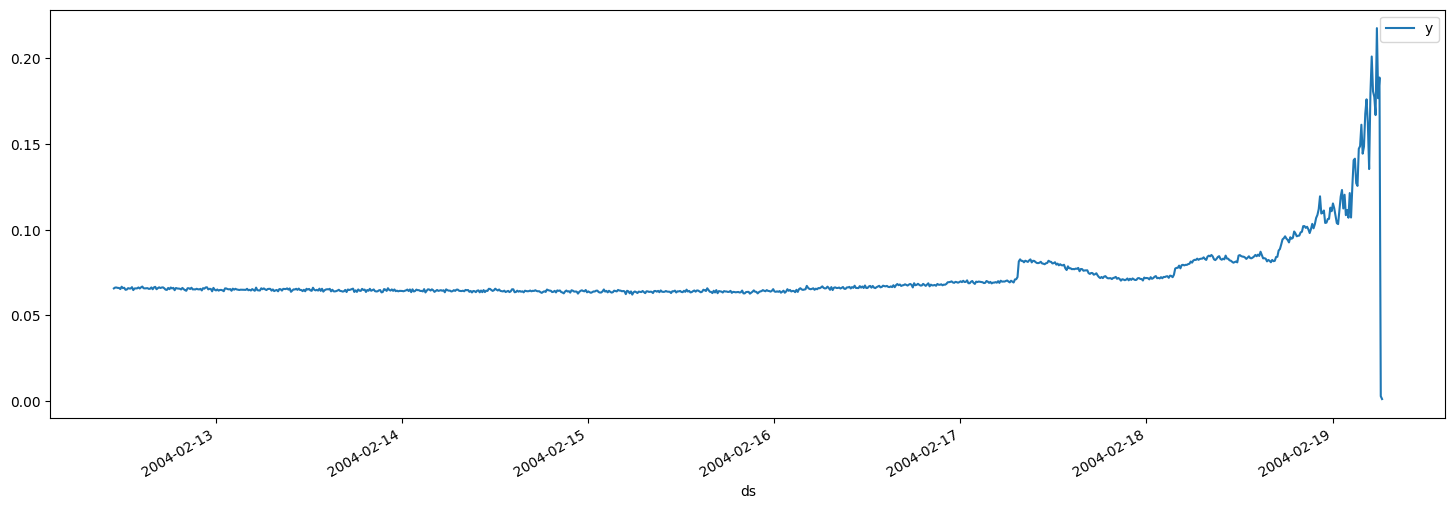

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
len(df)

982

In [ ]:
train = df.iloc[:len(df)-200]
test = df.iloc[len(df)-200:]

In [ ]:
from prophet import Prophet
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=200,freq='10T') #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv97eq8r5/g3svg3v5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv97eq8r5/to1nq4q1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1968', 'data', 'file=/tmp/tmpv97eq8r5/g3svg3v5.json', 'init=/tmp/tmpv97eq8r5/to1nq4q1.json', 'output', 'file=/tmp/tmpv97eq8r5/prophet_modelit54p7au/prophet_model-20231219060430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:04:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:04:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
977,2004-02-19 05:42:39,0.089435,0.086153,0.092078,0.087884,0.091141,-0.000378,-0.000378,-0.000378,-0.000378,-0.000378,-0.000378,0.0,0.0,0.0,0.089056
978,2004-02-19 05:52:39,0.089494,0.086358,0.092092,0.087930,0.091197,-0.000315,-0.000315,-0.000315,-0.000315,-0.000315,-0.000315,0.0,0.0,0.0,0.089179
979,2004-02-19 06:02:39,0.089553,0.086460,0.092149,0.087977,0.091267,-0.000242,-0.000242,-0.000242,-0.000242,-0.000242,-0.000242,0.0,0.0,0.0,0.089311
980,2004-02-19 06:12:39,0.089612,0.086720,0.092419,0.088024,0.091345,-0.000160,-0.000160,-0.000160,-0.000160,-0.000160,-0.000160,0.0,0.0,0.0,0.089452
981,2004-02-19 06:22:39,0.089671,0.086618,0.092528,0.088070,0.091424,-0.000069,-0.000069,-0.000069,-0.000069,-0.000069,-0.000069,0.0,0.0,0.0,0.089602


In [ ]:
test.tail()

,ds,y
977,2004-02-19 05:42:39,0.217710
978,2004-02-19 05:52:39,0.176775
979,2004-02-19 06:02:39,0.188874
980,2004-02-19 06:12:39,0.002758
981,2004-02-19 06:22:39,0.001088


In [ ]:
future

,ds
0,2004-02-12 10:52:39
1,2004-02-12 11:02:39
2,2004-02-12 11:12:39
3,2004-02-12 11:22:39
4,2004-02-12 11:32:39
...,...
977,2004-02-19 05:42:39
978,2004-02-19 05:52:39
979,2004-02-19 06:02:39
980,2004-02-19 06:12:39


In [ ]:
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-02-12 10:52:39,0.065669,0.065025,0.069489,0.065669,0.065669,0.001632,0.001632,0.001632,0.001632,0.001632,0.001632,0.0,0.0,0.0,0.067300
1,2004-02-12 11:02:39,0.065669,0.065011,0.069377,0.065669,0.065669,0.001559,0.001559,0.001559,0.001559,0.001559,0.001559,0.0,0.0,0.0,0.067229
2,2004-02-12 11:12:39,0.065670,0.064998,0.069301,0.065670,0.065670,0.001481,0.001481,0.001481,0.001481,0.001481,0.001481,0.0,0.0,0.0,0.067151
3,2004-02-12 11:22:39,0.065671,0.064982,0.069205,0.065671,0.065671,0.001398,0.001398,0.001398,0.001398,0.001398,0.001398,0.0,0.0,0.0,0.067069
4,2004-02-12 11:32:39,0.065672,0.064634,0.069126,0.065672,0.065672,0.001313,0.001313,0.001313,0.001313,0.001313,0.001313,0.0,0.0,0.0,0.066985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,2004-02-19 05:42:39,0.089435,0.086153,0.092078,0.087884,0.091141,-0.000378,-0.000378,-0.000378,-0.000378,-0.000378,-0.000378,0.0,0.0,0.0,0.089056
978,2004-02-19 05:52:39,0.089494,0.086358,0.092092,0.087930,0.091197,-0.000315,-0.000315,-0.000315,-0.000315,-0.000315,-0.000315,0.0,0.0,0.0,0.089179
979,2004-02-19 06:02:39,0.089553,0.086460,0.092149,0.087977,0.091267,-0.000242,-0.000242,-0.000242,-0.000242,-0.000242,-0.000242,0.0,0.0,0.0,0.089311
980,2004-02-19 06:12:39,0.089612,0.086720,0.092419,0.088024,0.091345,-0.000160,-0.000160,-0.000160,-0.000160,-0.000160,-0.000160,0.0,0.0,0.0,0.089452


In [ ]:
predictions = forecast.iloc[-200:]['yhat']

In [ ]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  0.028944434979584176
Mean Value of Test Dataset: 0.09435148286049118
